<ipython-input-3-4e34fd59f33f>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_daily.resample('M').mean()


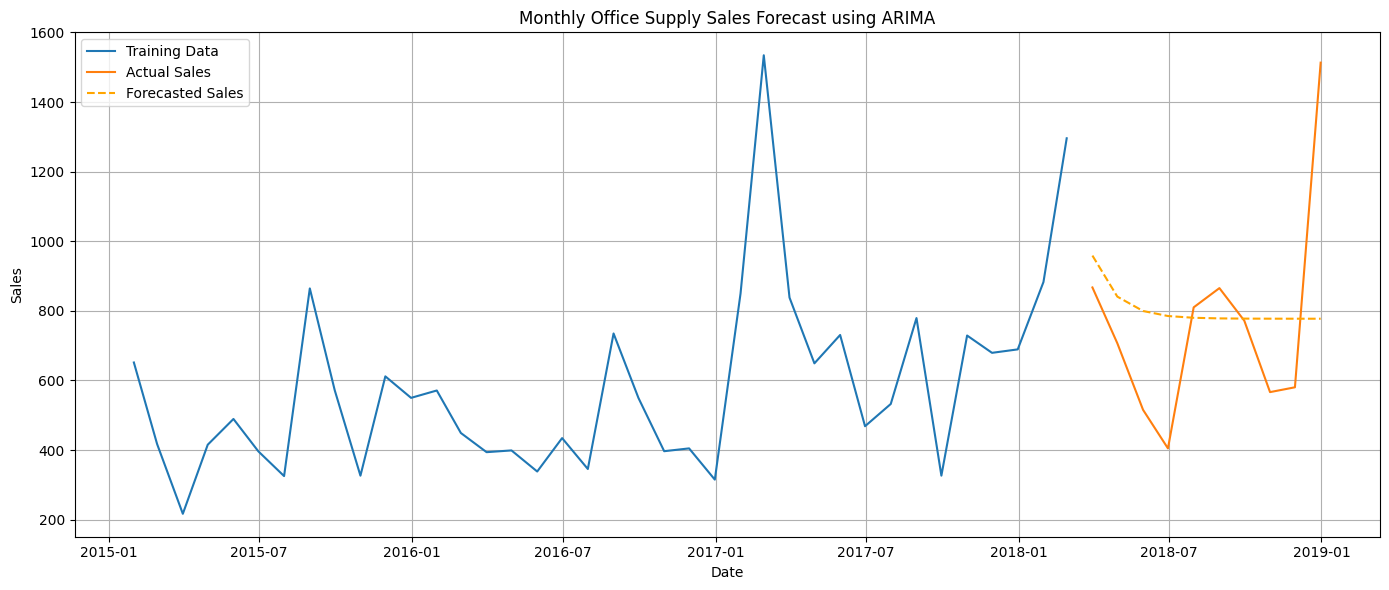

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Load the cleaned sales dataset
df = pd.read_csv("/content/cleaned_sales_data.csv")

# Convert 'Order Date' to datetime and set as index
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.set_index('Order Date', inplace=True)

# Aggregate daily sales, then resample to monthly average
df_daily = df['Sales'].resample('D').sum()
df_monthly = df_daily.resample('M').mean()

# Drop NA values (if any)
df_monthly.dropna(inplace=True)

# Split into training and test sets (80% training, 20% testing)
split_idx = int(len(df_monthly) * 0.8)
train = df_monthly[:split_idx]
test = df_monthly[split_idx:]

# Fit the ARIMA model (simple order to start with)
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Forecast for the length of the test set
forecast = model_fit.forecast(steps=len(test))

# Plot training, actual test, and forecasted values
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Sales')
plt.plot(test.index, forecast, label='Forecasted Sales', linestyle='--', color='orange')
plt.title("Monthly Office Supply Sales Forecast using ARIMA")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




